<a href="https://colab.research.google.com/github/prissyyy/Studi-Independen/blob/main/32-RB10_Ind-Text-Summarization-NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rabu, 27 Okt 2021 (Text Summarization in NLP)

# Text Summarization Menggunakan Metode Maximum Marginal Relevance (MMR)


REFERENSI

[Link Repository Github](https://github.com/fajri91/Text-Summarization-MMR)

## Pada proyek ini kita menggunakan tools (paket) sastrawi untuk melakukan stemming pada teks. Kenapa menggunakan tools ini, karena memang kita akan meringkas teks yang berbahasa Indonesia.

In [ ]:
# Ketik kode disini

!pip install sastrawi

# Import modul (tools)

In [ ]:
# Import modul

import re   # reguler ekspresi
# import sys  # untuk argv (tapi untuk Linux dan lokal)
import requests # untuk reques data dari repo github misalnya
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # stemming pakai sastrawi
from sklearn.feature_extraction.text import CountVectorizer # Vector 
from sklearn.metrics.pairwise import cosine_similarity # cosine similarity

import operator # operator artimatika dll

# Tahap Stemming pada teks berbahasa Indonesia

In [ ]:
# Membuat stemmer pakai sastrawi

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Load stopwords list dari repo github, yang akan dipakai untuk menghapus stopwords yang ada di teks

In [ ]:
# Ketik kode disini

def load_stopWords():
  url = "https://raw.githubusercontent.com/prissyyy/Studi-Independen/main/Data_Set/Text-Summarization-in-NLP/stopwordlist.txt"
  ina_stopword = requests.get(url).content
  return ina_stopword.split()

stopwords = load_stopWords()

In [ ]:
total = len(stopwords)
total

# Kita bisa melihat list stopwords dengan run stopwords

In [ ]:
# Tampilkan isi stopwordlist

stopwords

## Membuat fungsi untuk stemmer

In [ ]:
# Fungsi proses stemming kata

def cleanData(sentence):
	#sentence = re.sub('[^A-Za-z0-9 ]+', '', sentence)
	#sentence filter(None, re.split("[.!?", setence))
	ret = []
	sentence = stemmer.stem(sentence)	
	for word in sentence.split():
		if not word in stopwords:
			ret.append(word)
	return " ".join(ret)

## Membuat fungsi untuk vektor kata

In [ ]:
# Fungsi untuk membuat vektor kata

def getVectorSpace(cleanSet):
  vocab = {}
  for data in cleanSet:
    for word in data.split():
      vocab[data] = 0
  return vocab.keys()

## Membuat fungsi untuk menghitung cosine similarity

In [ ]:
# Fungsi untuk menghitung cosine similarity

def calculateSimilarity(sentence, doc):
	if doc == []:
		return 0
	vocab = {}
	for word in sentence:
		vocab[word] = 0
	
	docInOneSentence = '';
	for t in doc:
		docInOneSentence += (t + ' ')
		for word in t.split():
			vocab[word]=0	
	
	cv = CountVectorizer(vocabulary=vocab.keys())

	docVector = cv.fit_transform([docInOneSentence])
	sentenceVector = cv.fit_transform([sentence])
	return cosine_similarity(docVector, sentenceVector)[0][0]

# Load raw data teks dari repo github

In [ ]:
# Load raw data yang akan di ringkas

r = requests.get('https://raw.githubusercontent.com/prissyyy/Studi-Independen/main/Data_Set/Text-Summarization-in-NLP/news_data4.txt')
r.encoding = r.apparent_encoding
texts = r.text.split('\n')

In [ ]:
# Menampilkan text yang akan di ringkas

texts

In [ ]:
# import time
# start = time.time()

%%time

sentences = []
clean = []
originalSentenceOf = {}

#Data cleansing
for line in texts:
	parts = line.split('.')
	for part in parts:
		cl = cleanData(part)
		#print cl
		sentences.append(part)
		clean.append(cl)
		originalSentenceOf[cl] = part		
setClean = set(clean)		

## Menghitung nilai cosine similarity

In [ ]:
#calculate Similarity score each sentence with whole documents		
scores = {}
for data in clean:
	temp_doc = setClean - set([data])
	score = calculateSimilarity(data, list(temp_doc))
	scores[data] = score	

In [ ]:
#print score
print(scores)

# Untuk menghitung summarization kita menggunakan Algoritma MMR

Algoritma MMR (Maximum Marginal Relevance) merupakan metode ekstraksi ringkasan yang digunakan untuk meringkas dokumen tunggal maupun multi dokumen.

MMR meringkas dokumen dengan melakukan  perhitungan  kesamaan antara bagian teks. Pada peringkasan   dokumen dilakukan proses segmentasi dokumen menjadi kalimat dan dilakukan pengelompokan sesuai dengan gender kalimat tersebut.

MMR digunakan dengan mengkombinasikan matrik cosine similarity untuk merangking kalimat-kalimat sebagai tanggapan pada query yang diberikan oleh user.


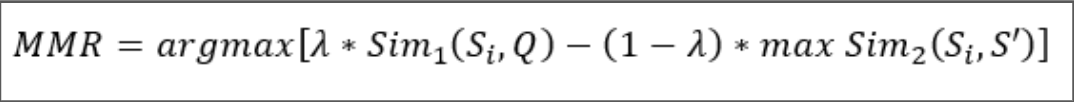

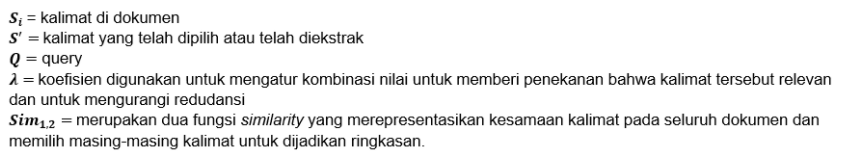

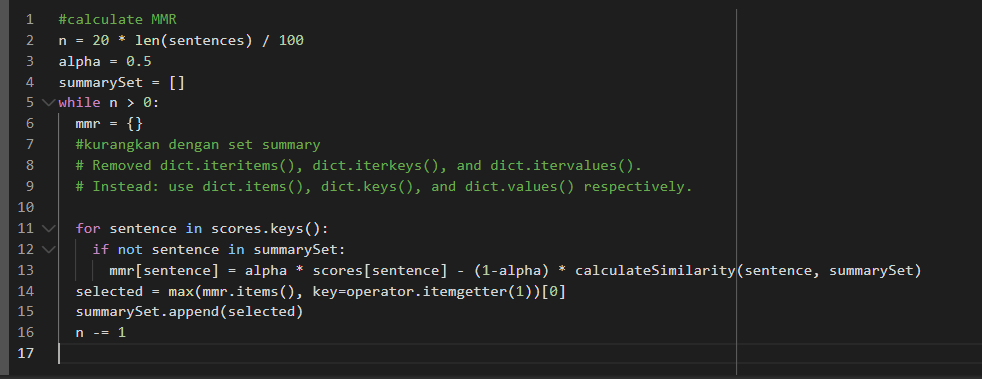

In [ ]:
# calculate MMR
n = 20 * len(sentences) / 100
alpha = 0.5
summarySet = []
while n > 0:
	mmr = {}
	#kurangkan dengan set summary
  # Removed dict.iteritems(), dict.iterkeys(), and dict.itervalues().
  # Instead: use dict.items(), dict.keys(), and dict.values() respectively.

	for sentence in scores.keys():
		if not sentence in summarySet:
			mmr[sentence] = alpha * scores[sentence] - (1-alpha) * calculateSimilarity(sentence, summarySet)	
	selected = max(mmr.items(), key=operator.itemgetter(1))[0]	
	summarySet.append(selected)
	n -= 1

#rint str(time.time() - start)

In [ ]:
sentences

In [ ]:
n

## Menampilkan hasil Summary dari hasil perhitungan Algoritma MMR

In [ ]:
# Menanmpilkan hasil Summary

print ('\nSummary (hasil teks yang diringkas):\n')
for sentence in summarySet:
	print (originalSentenceOf [sentence].lstrip(' '))
print ('')

## Menampilkan perbandingan Summary text dengan teks asli sebelum si summary. Setiap kalimat yang di jadikan sebagai summary akan di highlight merah.

In [ ]:
print ('=============================================================')
print ('\nOriginal Passages (Teks Asli):\n')
from termcolor import colored # tools untuk membuat highlight merah

for sentence in clean:
	if sentence in summarySet:
		print (colored(originalSentenceOf[sentence].lstrip(' '), 'yellow'))
	else:
		print (originalSentenceOf[sentence].lstrip(' '))

## Activity:
Waktu pengerjaan 30-60 menit dan buat 4-5 kelompok.

1. Gunakan teknik "heapq" untuk teks berbahasa Indonesia

- Gunakan corpus minimal 1 artikel dan harus dengan topik terkini (preprocessing boleh dilakukan secara manual dan boleh dilakukan secara otomatis dengan kode)
- Lakukan proses stemming dan gunakan stopwordslist Indonesia yang tersedia di repositori github https://raw.githubusercontent.com/Wayan123/Sentiment-Analysis/main/stopwordlist.txt

2. Gunakan metode "MMR" untuk Teks berbahasa Inggris

- Gunakan corpus minimal 1 artikel dan harus dengan topik terkini (preprocessing boleh dilakukan secara manual dan boleh dilakukan secara otomatis dengan kode)

Note: Teks boleh di scraping menggunakan tools seperti beautifulsoup4, scrapy, dan silakan di improve dan buat sesuai kemampuan.

